In [123]:
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import re
import scanpy as sc

In [240]:
# Stereoscope analysis

stereoscope_folder = '../../results/stereoscope_res/'
cluster_file = '../../results/Batch_corrections/seurat/TX_mt_kept/TX_st_adata_cluster.h5ad'
cluster_df = sc.read_h5ad(cluster_file).obs
human_cutoff= 0.25 # only consider features with over this value

slides = ['CN56', 'ST3']
slide = slides[0]
out = stereoscope_folder + 'plt/'
os.makedirs(out, exist_ok=True)

/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [241]:
walk = list(os.walk(stereoscope_folder, topdown=False))

/tmp/ipykernel_176593/3337429015.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['celltype'] = ct
/tmp/ipykernel_176593/3337429015.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['perc'] = merge_df[ct]
/tmp/ipykernel_176593/3337429015.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

/tmp/ipykernel_176593/3337429015.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['celltype'] = ct
/tmp/ipykernel_176593/3337429015.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['perc'] = merge_df[ct]
/tmp/ipykernel_176593/3337429015.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

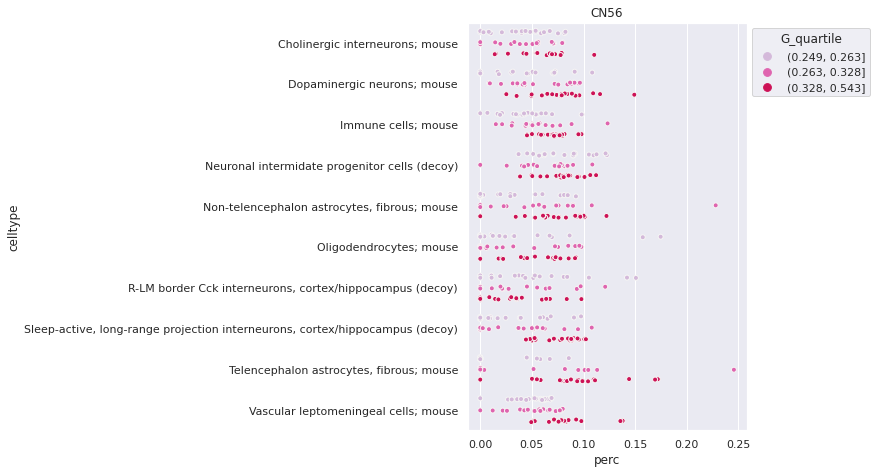

/tmp/ipykernel_176593/3337429015.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['celltype'] = ct
/tmp/ipykernel_176593/3337429015.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['perc'] = merge_df[ct]
/tmp/ipykernel_176593/3337429015.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

/tmp/ipykernel_176593/3337429015.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['celltype'] = ct
/tmp/ipykernel_176593/3337429015.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['perc'] = merge_df[ct]
/tmp/ipykernel_176593/3337429015.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

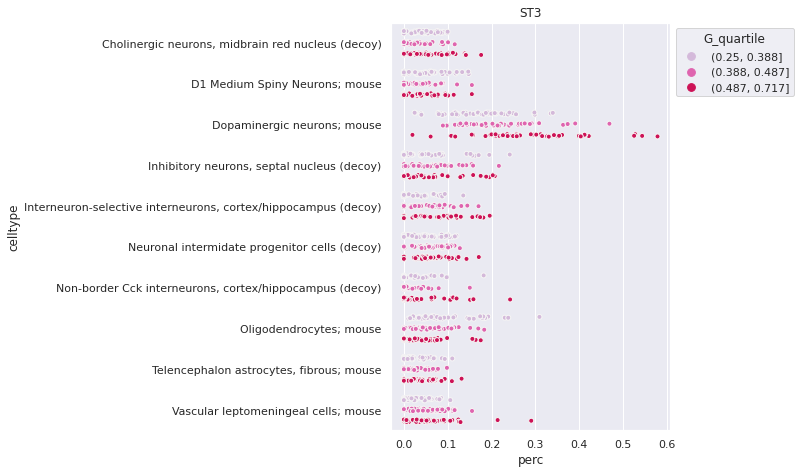

In [243]:
for slide in slides:
    #find stereoscope files in ALL their folders
    files = [x for x in walk if slide in str(x) and re.search('W.[0-9.-]+.tsv', str(x))]
    files = [''.join(c for c in str(x) if c not in "[]()'") for x in files]
    files = [x.replace(',', '/').replace(' ', '').replace('//', '/') for x in files]

    # merge all files
    merge_df = pd.DataFrame()
    for df in files:
        df = pd.read_csv(df, header=0, index_col=None, sep="\t")
        merge_df = pd.concat([merge_df, df])
    celltypes = merge_df.columns[1:]
    
    # add cluster and human content information
    slide_df = cluster_df[cluster_df['slide'] == slide]
    info_col = slide_df.columns
    merge_df = merge_df.merge(slide_df, left_on='Unnamed: 0', right_on='feature')
    
    # create a plot dataframe for seaborn
    plot_df = pd.DataFrame()
    for ct in celltypes:
        temp_df = merge_df[info_col]
        temp_df['celltype'] = ct
        temp_df['perc'] = merge_df[ct]
        plot_df = pd.concat([plot_df, temp_df])
    plot_df = plot_df[plot_df['G_content'] > human_cutoff]
    plot_df['G_quartile'] = pd.qcut(plot_df['G_content'], q=3)
    
    # select top 10 celltypes most  represented in teh highest human group 
    
    top_ct = plot_df[plot_df['G_quartile'] == plot_df['G_quartile'].max()]
    top_ct = top_ct.groupby('celltype').mean()
    top_ct = top_ct.sort_values(by= 'perc', ascending=False)
    top_ct = top_ct.index.to_list()[:10]  
    
    # filter the plot for teh top 10- celltypes
    plot_df = plot_df[plot_df['celltype'].isin(top_ct)]
    
    # plot
    sns.set(rc={'figure.figsize':(5, 0.75*len(top_ct))})
    
    ax = sns.stripplot(data = plot_df,
              x = 'perc' , y='celltype', 
              hue="G_quartile", 
              palette='PuRd',
              edgecolor='#f6f6f5',
              linewidth=1,
              dodge=True,
              jitter = 0.1)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.title(slide)
    plt.savefig(f'{out}{slide}_stereoscope_human-over{human_cutoff}_celltype_perc.pdf', 
             bbox_inches='tight', dpi=400)
    plt.savefig(f'{out}{slide}_stereoscope_human-over{human_cutoff}_celltype_perc.png', 
             bbox_inches='tight', dpi=400)
    plt.show()

In [244]:
# Cell2loc analysis

c2l_folder = '../../results/cell2loc_res/L5_CTX_M_STR_CNS_Tax4_selection_1000_astro-merge/TX/cell2location_map/ct_df/'
cluster_file = '../../results/Batch_corrections/seurat/TX_mt_kept/TX_st_adata_cluster.h5ad'
cluster_df = sc.read_h5ad(cluster_file).obs
human_cutoff= 0.25 # only consider features with over this value

slides = ['CN56', 'ST3']
slide = slides[0]
out = '../../results/cell2loc_res/L5_CTX_M_STR_CNS_Tax4_selection_1000_astro-merge/TX/plt/'
os.makedirs(out, exist_ok=True)

/home/lcadmin/miniconda3/envs/ST_pipeline/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


/tmp/ipykernel_176593/3689081100.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['celltype'] = ct
/tmp/ipykernel_176593/3689081100.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['perc'] = merge_df[ct]
/tmp/ipykernel_176593/3689081100.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

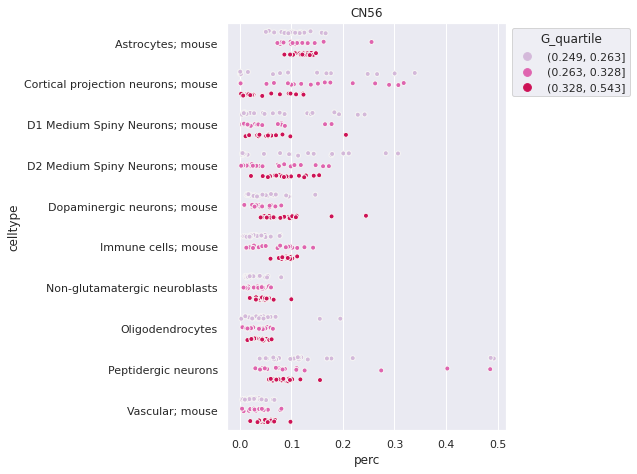

/tmp/ipykernel_176593/3689081100.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['celltype'] = ct
/tmp/ipykernel_176593/3689081100.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['perc'] = merge_df[ct]
/tmp/ipykernel_176593/3689081100.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

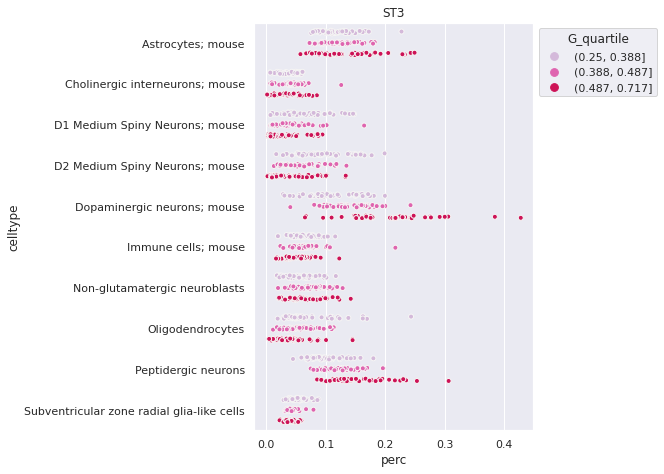

In [245]:
for slide in slides:
    #find c2l files in the result folder
    files = [c2l_folder + x for x in os.listdir(c2l_folder) if slide in x and '.tsv' in x]

    # merge all files
    merge_df = pd.DataFrame()
    for df in files:
        df = pd.read_csv(df, header=0, index_col=0, sep="\t")
        df = df.div(df.sum(axis=1), axis=0)
        df = df.reset_index()
        merge_df = pd.concat([merge_df, df])
    celltypes = merge_df.columns[1:]
    
    # add cluster and human content information
    slide_df = cluster_df[cluster_df['slide'] == slide]
    info_col = slide_df.columns
    merge_df = merge_df.merge(slide_df, left_on='feature', right_on='feature')
    
    
    # create a plot dataframe for seaborn
    plot_df = pd.DataFrame()
    for ct in celltypes:
        temp_df = merge_df[info_col]
        temp_df['celltype'] = ct
        temp_df['perc'] = merge_df[ct]
        plot_df = pd.concat([plot_df, temp_df])
    plot_df = plot_df[plot_df['G_content'] > human_cutoff]
    plot_df['G_quartile'] = pd.qcut(plot_df['G_content'], q=3)
    
    # select top 10 celltypes most  represented in teh highest human group 
    
    top_ct = plot_df[plot_df['G_quartile'] == plot_df['G_quartile'].max()]
    top_ct = top_ct.groupby('celltype').mean()
    top_ct = top_ct.sort_values(by= 'perc', ascending=False)
    top_ct = top_ct.index.to_list()[:10]  
    
    # filter the plot for teh top 10- celltypes
    plot_df = plot_df[plot_df['celltype'].isin(top_ct)]
    
    # plot
    sns.set(rc={'figure.figsize':(5, 0.75*len(top_ct))})
    
    ax = sns.stripplot(data = plot_df,
              x = 'perc' , y='celltype', 
              hue="G_quartile", 
              palette='PuRd',
              edgecolor='#f6f6f5',
              linewidth=1,
              dodge=True,
              jitter = 0.1)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.title(slide)
    plt.savefig(f'{out}{slide}_c2l_human-over{human_cutoff}_celltype_perc.pdf', 
             bbox_inches='tight', dpi=400)
    plt.savefig(f'{out}{slide}_c2l_human-over{human_cutoff}_celltype_perc.png', 
             bbox_inches='tight', dpi=400)
    plt.show()

In [218]:
dffile = files[0]
dffile

'../../results/cell2loc_res/L5_CTX_M_STR_CNS_Tax4_selection_1000_astro-merge/TX/cell2location_map/ct_df/CN56_C2_cell_proportions.tsv'

In [221]:
df = pd.read_csv(dffile, header=0, index_col=0, sep="\t")
print(df.shape)
df = df.div(df.sum(axis=1), axis=0)
df.shape

(797, 22)


(797, 22)